# **Importing libraries**

In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


# **Data loading and visualising.**

In [3]:
data = pd.read_csv('Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# **Dividing data into training and testing parts**

In [5]:
X = data.iloc[:, 0:-1].values # iloc is function for indexing of dataframes.
Y = data.label.values

# OneHotEncoding
encoder = OneHotEncoder() # using encoding of class_type as this is a multi class problem.
Y = encoder.fit_transform(Y.reshape(-1,1)).toarray() # fitting our data to encoder.

X, Y

(array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
           6.50298529, 202.9355362 ],
        [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
           7.03809636, 226.6555374 ],
        [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
           7.84020714, 263.9642476 ],
        ...,
        [118.        ,  33.        ,  30.        , ...,  67.22512329,
           6.36260785, 173.3228386 ],
        [117.        ,  32.        ,  34.        , ...,  52.12739421,
           6.75879255, 127.1752928 ],
        [104.        ,  18.        ,  30.        , ...,  60.39647474,
           6.77983261, 140.9370415 ]]), array([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

# **MLP**

In [8]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(7,22), max_iter=1000, activation='relu')
mlp.fit(x_train, y_train)
pred = mlp.predict(x_test)

In [9]:
y_pred_con = mlp.predict(x_test)
y_pred, y_correct = [], []

for i in y_test:
    y_correct.append(np.argmax(i))
for j in y_pred_con:
    y_pred.append(np.argmax(j))
    
pred_df = pd.DataFrame()
pred_df['Pred_class'] = y_pred
pred_df['Correct_class'] = y_correct
pred_df

,Pred_class,Correct_class
0,21,21
1,21,21
2,7,7
3,3,3
4,2,2
...,...,...
435,18,18
436,1,1
437,6,6
438,2,2


              precision    recall  f1-score   support

           0       1.00      0.33      0.49        55
           1       1.00      0.90      0.95        20
           2       0.82      0.82      0.82        22
           3       1.00      1.00      1.00        23
           4       0.87      0.87      0.87        15
           5       0.94      0.94      0.94        17
           6       1.00      0.84      0.91        19
           7       1.00      1.00      1.00        18
           8       0.62      0.62      0.62        21
           9       0.90      0.75      0.82        24
          10       0.94      0.94      0.94        17
          11       0.72      1.00      0.84        13
          12       1.00      1.00      1.00        21
          13       0.56      0.88      0.68        16
          14       0.94      1.00      0.97        16
          15       1.00      1.00      1.00        23
          16       0.91      1.00      0.95        21
          17       0.48    

Text(42.0, 0.5, 'Truth')

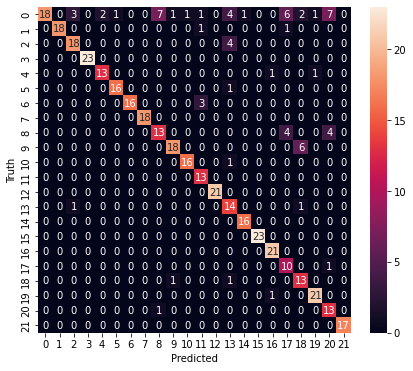

In [10]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import tensorflow as tf
print(classification_report(y_pred, y_correct))
cm = tf.math.confusion_matrix(y_pred, y_correct)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

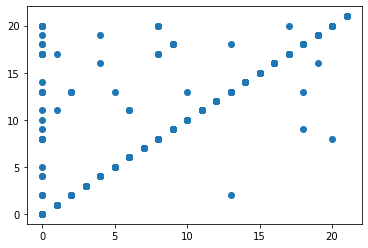

In [11]:
plt.scatter(y_pred, y_correct)
plt.show()

In [13]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error, mean_absolute_percentage_error
print(accuracy_score(y_pred, y_correct))
print(mean_absolute_error(y_pred, y_correct))
print(mean_squared_error(y_pred, y_correct))
print(max_error(y_pred, y_correct))

0.8386363636363636
1.7659090909090909
23.615909090909092
20


# **Creating ANN Model**

In [14]:
# creating model
model = Sequential()

# adding hidden layers with number of units and activation function.
model.add(Dense(units = 64, activation = 'relu', input_dim = 7)) #hiddenlayer1 with and extra parameter input dimensions which is 16 in out case that is no. of features in training data.
model.add(Dense(units = 32, activation = 'relu')) #hiddenlayer2
model.add(Dense(units = 22, activation = 'sigmoid')) #outputlayer

# compiling our model.
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) #metrics are the list of parameters on which we test our model like accuracy.

In [15]:
# fitting data to train our model and then validating score with validation_data.
model.fit(x_train, y_train, epochs=40, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/40
220/220 [==============================] - 6s 7ms/step - loss: 6.2204 - accuracy: 0.3466 - val_loss: 1.2802 - val_accuracy: 0.6000
Epoch 2/40
220/220 [==============================] - 1s 5ms/step - loss: 0.7812 - accuracy: 0.7670 - val_loss: 0.5868 - val_accuracy: 0.7977
Epoch 3/40
220/220 [==============================] - 1s 3ms/step - loss: 0.4507 - accuracy: 0.8625 - val_loss: 0.4435 - val_accuracy: 0.8636
Epoch 4/40
220/220 [==============================] - 1s 3ms/step - loss: 0.3664 - accuracy: 0.8716 - val_loss: 0.3597 - val_accuracy: 0.8727
Epoch 5/40
220/220 [==============================] - 1s 3ms/step - loss: 0.3026 - accuracy: 0.8949 - val_loss: 0.3294 - val_accuracy: 0.8705
Epoch 6/40
220/220 [==============================] - 1s 3ms/step - loss: 0.2752 - accuracy: 0.9023 - val_loss: 0.3060 - val_accuracy: 0.8909
Epoch 7/40
220/220 [==============================] - 1s 3ms/step - loss: 0.2445 - accuracy: 0.9199 - val_loss: 0.1865 - val_accuracy: 0.9273
Epoch 

In [16]:
# printing score with evaluate
print(model.evaluate(x_test, y_test)[1])

14/14 [==============================] - 0s 3ms/step - loss: 0.1195 - accuracy: 0.9545
0.9545454382896423


In [17]:
y_pred_con = model.predict(x_test)
y_pred, y_correct = [], []

for i in y_test:
    y_correct.append(np.argmax(i))
for j in y_pred_con:
    y_pred.append(np.argmax(j))
    
pred_df = pd.DataFrame()
pred_df['Pred_class'] = y_pred
pred_df['Correct_class'] = y_correct
pred_df

,Pred_class,Correct_class
0,21,21
1,21,21
2,0,7
3,3,3
4,2,2
...,...,...
435,18,18
436,1,1
437,6,6
438,2,2


              precision    recall  f1-score   support

           0       1.00      0.69      0.82        26
           1       1.00      1.00      1.00        18
           2       0.86      0.95      0.90        20
           3       1.00      1.00      1.00        23
           4       1.00      0.83      0.91        18
           5       1.00      1.00      1.00        17
           6       1.00      0.89      0.94        18
           7       0.56      1.00      0.71        10
           8       1.00      0.72      0.84        29
           9       1.00      0.87      0.93        23
          10       1.00      0.94      0.97        18
          11       0.89      1.00      0.94        16
          12       1.00      0.88      0.93        24
          13       0.96      0.89      0.92        27
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       0.87      1.00      0.93        20
          17       0.90    

Text(42.0, 0.5, 'Truth')

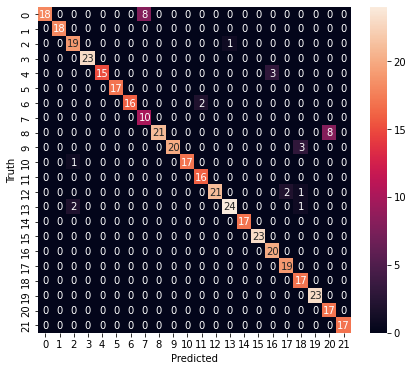

In [19]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import tensorflow as tf
print(classification_report(y_pred, y_correct))
cm = tf.math.confusion_matrix(y_pred, y_correct)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

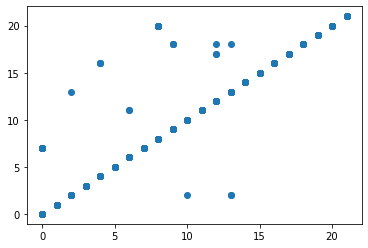

In [20]:
plt.scatter(y_pred, y_correct)
plt.show()

In [21]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error, mean_absolute_percentage_error
print(accuracy_score(y_pred, y_correct))
print(mean_absolute_error(y_pred, y_correct))
print(mean_squared_error(y_pred, y_correct))
print(max_error(y_pred, y_correct))

0.9272727272727272
0.6522727272727272
6.379545454545455
12


# **CREATING RNN MODEL**

In [22]:
from keras.layers import Flatten
model = Sequential()

# adding hidden layers with number of units and activation function.
model.add(LSTM(units = 64, activation = 'relu',input_shape=(7,1))) #hiddenlayer1 with and extra parameter input dimensions which is 16 in out case that is no. of features in training data.
model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu')) #hiddenlayer2
model.add(Dense(units = 22, activation = 'sigmoid')) #outputlayer

# compiling our model.
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) #metrics are the list of parameters on which we test our model like accuracy.

In [23]:
# fitting data to train our model and then validating score with validation_data.
model.fit(x_train, y_train, epochs=40, batch_size=8, validation_data=(x_test, y_test))

Epoch 1/40
220/220 [==============================] - 3s 9ms/step - loss: 2.1478 - accuracy: 0.3852 - val_loss: 0.9191 - val_accuracy: 0.6750
Epoch 2/40
220/220 [==============================] - 2s 8ms/step - loss: 0.5465 - accuracy: 0.8119 - val_loss: 0.2803 - val_accuracy: 0.9182
Epoch 3/40
220/220 [==============================] - 2s 8ms/step - loss: 0.3239 - accuracy: 0.8824 - val_loss: 0.1803 - val_accuracy: 0.9455
Epoch 4/40
220/220 [==============================] - 2s 8ms/step - loss: 0.2442 - accuracy: 0.9108 - val_loss: 0.1503 - val_accuracy: 0.9477
Epoch 5/40
220/220 [==============================] - 2s 9ms/step - loss: 0.1808 - accuracy: 0.9369 - val_loss: 0.2357 - val_accuracy: 0.9045
Epoch 6/40
220/220 [==============================] - 2s 8ms/step - loss: 0.1926 - accuracy: 0.9335 - val_loss: 0.4768 - val_accuracy: 0.8818
Epoch 7/40
220/220 [==============================] - 2s 8ms/step - loss: 0.1325 - accuracy: 0.9517 - val_loss: 0.1469 - val_accuracy: 0.9432
Epoch 

In [24]:
y_pred_con = model.predict(x_test)
y_pred, y_correct = [], []

for i in y_test:
    y_correct.append(np.argmax(i))
for j in y_pred_con:
    y_pred.append(np.argmax(j))
    
pred_df = pd.DataFrame()
pred_df['Pred_class'] = y_pred
pred_df['Correct_class'] = y_correct
pred_df

,Pred_class,Correct_class
0,21,21
1,21,21
2,7,7
3,3,3
4,2,2
...,...,...
435,18,18
436,1,1
437,6,6
438,2,2


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00        23
           4       0.87      1.00      0.93        13
           5       0.88      1.00      0.94        15
           6       0.88      1.00      0.93        14
           7       1.00      1.00      1.00        18
           8       0.90      0.86      0.88        22
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        17
          11       1.00      0.90      0.95        20
          12       1.00      0.95      0.98        22
          13       0.96      0.92      0.94        26
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      0.92      0.96        25
          17       1.00    

Text(42.0, 0.5, 'Truth')

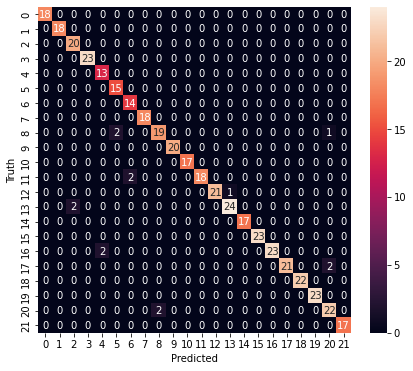

In [25]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import tensorflow as tf
print(classification_report(y_pred, y_correct))
cm = tf.math.confusion_matrix(y_pred, y_correct)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

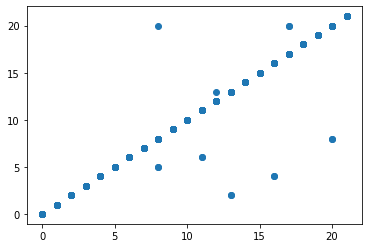

In [26]:
plt.scatter(y_pred, y_correct)
plt.show()

In [27]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error, mean_absolute_percentage_error
print(accuracy_score(y_pred, y_correct))
print(mean_absolute_error(y_pred, y_correct))
print(mean_squared_error(y_pred, y_correct))
print(max_error(y_pred, y_correct))

0.9681818181818181
0.23863636363636365
2.3840909090909093
12
